In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for seaborn
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load the Iris dataset using sklearn and handle any errors that may occur
from sklearn.datasets import load_iris

try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading the dataset: {e}")
from sklearn.datasets import load_iris

# Use try-except to handle loading errors
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading the dataset: {e}")

Dataset loaded successfully.


In [3]:
# Display the first five rows to inspect the data structure and values
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Check the data types of each column and identify any missing values in the dataset
print("Data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# Clean the dataset by dropping rows with missing values (if any are found)
df_cleaned = df.dropna()
print(f"Shape after dropping missing values: {df_cleaned.shape}")

Shape after dropping missing values: (150, 5)


In [6]:
# Compute basic statistics (mean, std, min, max, etc.) for all numerical columns
df_cleaned.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
grouped_means = df_cleaned.groupby('target').mean()
grouped_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [8]:
# Map the target column (numeric species codes) to species names for clarity
species_map = dict(enumerate(iris.target_names))
df_cleaned['species'] = df_cleaned['target'].map(species_map)
# Group the dataset by species and calculate the mean for each numerical column
grouped_means = df_cleaned.groupby('species').mean()
grouped_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


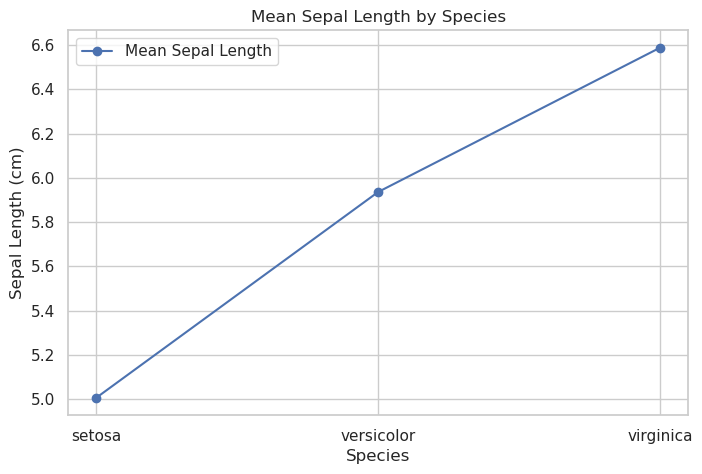

In [10]:
# Plot a line chart showing the mean sepal length for each species
plt.figure(figsize=(8,5))
plt.plot(grouped_means.index, grouped_means['sepal length (cm)'], marker='o', label='Mean Sepal Length')
plt.title('Mean Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

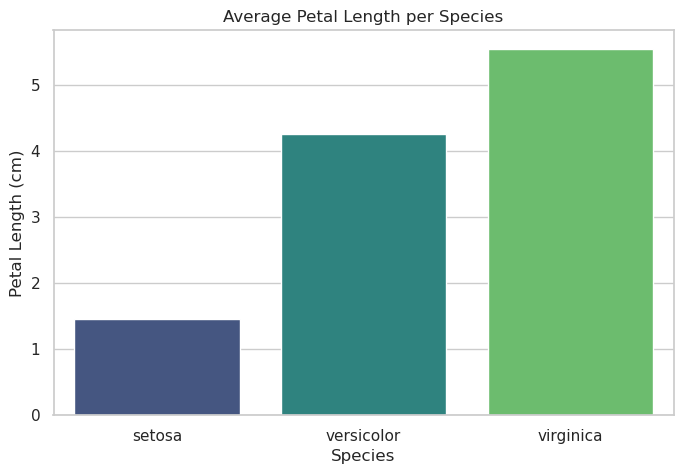

In [11]:
# Create a bar chart to compare the average petal length across species
plt.figure(figsize=(8,5))
sns.barplot(x=grouped_means.index, y=grouped_means['petal length (cm)'], palette='viridis')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

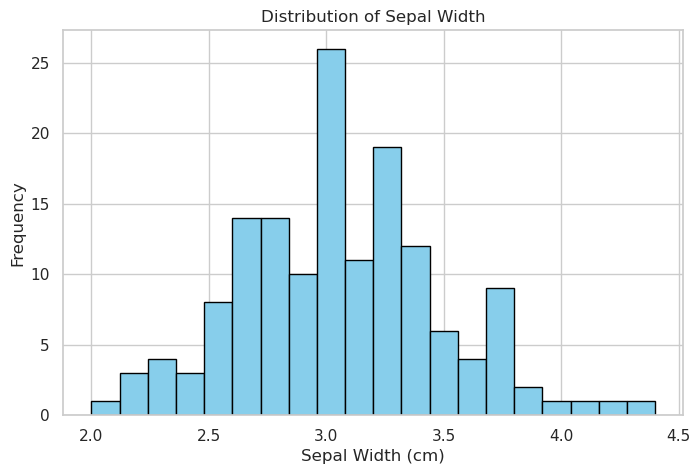

In [12]:
# Plot a histogram to visualize the distribution of sepal width values
plt.figure(figsize=(8,5))
plt.hist(df_cleaned['sepal width (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

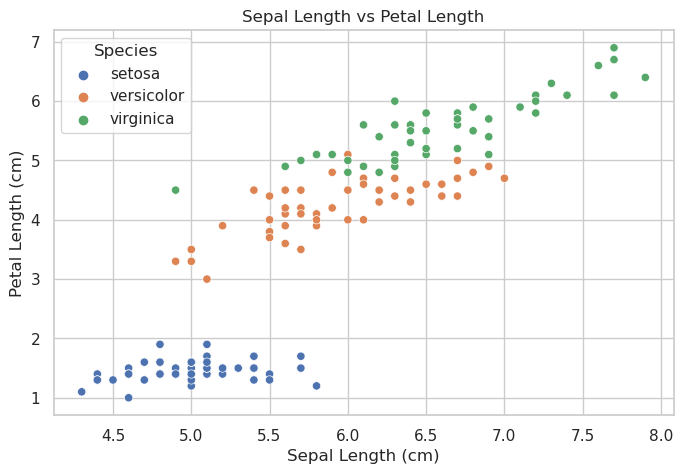

In [13]:
# Create a scatter plot to show the relationship between sepal length and petal length, colored by species
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cleaned, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()

In [14]:
# Example of error handling: attempt to load a non-existent file and catch the FileNotFoundError
try:
    # Example: Try to load a non-existent file
    pd.read_csv('non_existent_file.csv')
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")

The specified file was not found. Please check the file path.
